In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/after_down_ETH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,down,2017-03-18 15:00:01,LCheytanov,4,1,#Blockchain #Ethereum #fintech,Qtum's #Blockchain Crowdfund Scores Over $12M ...
1,ETH,down,2017-03-18 15:00:07,EthereumPrice_,0,2,#Ethereum,#Ethereum: Ether Price Index 1 ETH =0.037074Ƀ ...
2,ETH,down,2017-03-18 15:00:07,coinstats,0,0,#Ethereum #ETH,Ethereum - ETH Price: $38.1999 Change in 1h: +...
3,ETH,down,2017-03-18 15:00:08,BeyondVoidGame,9,9,#BTV #indiegame #ethereum,#BTV beta session live NOW looking forward to ...
4,ETH,down,2017-03-18 15:00:16,alt_ccy,0,0,#Ethereum,#Ethereum Price Surge Is Due To One Singular F...
...,...,...,...,...,...,...,...,...
423,ETH,down,2017-03-18 20:52:36,TBMGPT_News,0,0,NaN,Op-Ed: Can Ethereum Overtake Bitcoin? http://d...
424,ETH,down,2017-03-18 20:55:08,nasir96risan,0,2,NaN,Ethereum Price Surge Is Due To One Singular Fa...
425,ETH,down,2017-03-18 20:56:41,ahmedjo0o,0,0,NaN,مين يعرف معلومات عن ethereum ياخوانا :)
426,ETH,down,2017-03-18 20:57:33,colinjeffrey1,0,0,#OnlineAdvertising,First Ethereum Block Chain Currency For Online...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [qtum, 's, blockchain, crowdfund, scores, over...
1      [ethereum, :, ether, price, index, 1, eth, =0....
2      [ethereum, eth, price, :, $, 38.1999, change, ...
3      [btv, beta, session, live, now, looking, forwa...
4      [ethereum, price, surge, is, due, to, one, sin...
                             ...                        
423    [op, ed, :, can, ethereum, overtake, bitcoin, ...
424    [ethereum, price, surge, is, due, to, one, sin...
425    [مين, يعرف, معلومات, عن, ethereum, ياخوانا, :, )]
426    [first, ethereum, block, chain, currency, for,...
427    [is, there, anything, stopping, me, from, usin...
Name: text, Length: 428, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [qtum, 's, blockchain, crowdfund, scores, $, b...
1      [ethereum, :, price, index, eth, =0.037074ƀ, x...
2      [ethereum, eth, price, :, $, change, :, +, %, ...
3      [btv, beta, session, live, looking, playing, :...
4        [ethereum, price, surge, due, singular, factor]
                             ...                        
423    [op, ed, :, ethereum, overtake, bitcoin, ?, nf...
424    [ethereum, price, surge, due, singular, factor...
425    [مين, يعرف, معلومات, عن, ethereum, ياخوانا, :, )]
426    [ethereum, block, chain, currency, online, adv...
427    [anything, stopping, using, ethereum, blockcha...
Name: text, Length: 428, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

887

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

887


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

887

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

887

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

649.8888087919578

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.554670083440099

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02769883079214267

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9,"[0.0016358988359570503, -0.01791541650891304, ...",ethereum,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.152441,0.845976,0.306465,NaN
4,"[0.004626608919352293, -0.014411128126084805, ...",bitcoin,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.220089,0.436416,0.783673,NaN
1,"[0.004920312203466892, -0.0059122368693351746,...",blockchain,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.198292,0.104068,1.094223,NaN
191,"[-0.0012947736540809274, -0.00372154894284904,...",trade,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.311801,0.033570,1.278230,NaN
75,"[0.006515652406960726, -0.009442317299544811, ...",crowdsale,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.303823,0.021821,1.282003,NaN
11,"[0.004111249465495348, -0.008463690988719463, ...",price,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.482063,0.137639,1.344424,NaN
16,"[0.005904024466872215, -0.003635806031525135, ...",market,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.408187,0.060427,1.347760,NaN
5,"[0.005738754756748676, -0.004267227370291948, ...",investor,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.394976,0.033570,1.361405,NaN
293,"[0.0014036500360816717, -0.008083184249699116,...",drop,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.409863,0.025178,1.384685,NaN
153,"[-0.0014702313346788287, -0.007980188354849815...",contract,0,"[0.0006457214, -0.0023475904, -0.00081608363, ...",0.412668,0.015107,1.397561,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
174,"[0.0031640161760151386, -0.0015369607135653496...",cryptocoinsnews,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.552972,0.021821,1.531151,NaN
834,"[-0.00044730439549311996, -0.00257802847772836...",conheço,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.607290,0.001679,1.605612,NaN
246,"[0.0009080026648007333, 0.0029551968909800053,...",gamble,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.616726,0.006714,1.610012,NaN
154,"[-0.0033936069812625647, -0.000452597130788490...",program,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.621872,0.001679,1.620194,NaN
775,"[-0.001370609039440751, 0.0005340108182281256,...",prez,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.640563,0.001679,1.638885,NaN
217,"[0.004740362521260977, 0.0036243353970348835, ...",neonetwalker,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.642465,0.001679,1.640786,NaN
173,"[-0.002305062720552087, -0.0019058173056691885...",theflippening,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.648581,0.001679,1.646903,NaN
646,"[-0.0035221620928496122, 0.00294238212518394, ...",dollar,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.655185,0.005036,1.650149,NaN
811,"[-0.0009164095390588045, 0.0006438679411076009...",mantiene,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.657050,0.006714,1.650336,NaN
765,"[0.0015518543077632785, -0.001283235615119338,...",chug,1,"[-0.00019414871, 0.00024144625, -0.00033062662...",0.652913,0.001679,1.651234,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
343,"[-0.0001641255512367934, -0.006136789917945862...",altcoins,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.428164,0.011750,1.416414,NaN
36,"[-0.003251797752454877, -0.0001569037412991747...",coin,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.485063,0.020142,1.464921,NaN
27,"[0.003069760277867317, 3.6000132240587845e-05,...",overtake,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.579096,0.114140,1.464957,NaN
117,"[0.004697359167039394, -0.009245069697499275, ...",movie,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.504345,0.016785,1.487560,NaN
80,"[0.00543839018791914, -0.0004543833201751113, ...",platform,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.514462,0.020142,1.494320,NaN
832,"[-0.0018992889672517776, -0.003165479982271790...",ethereummarket,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.522167,0.011750,1.510417,NaN
152,"[-0.0027213229332119226, -0.005054471548646688...",smart,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.532477,0.015107,1.517370,NaN
24,"[0.00576659943908453, -0.0031636531930416822, ...",surge,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.584673,0.060427,1.524246,NaN
220,"[0.0007958388305269182, -0.0060655795969069, 0...",decentralize,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.534929,0.010071,1.524858,NaN
51,"[0.002961757592856884, -0.000104831691714935, ...",alphabay,2,"[0.00025732533, -0.0011377217, 0.00011686889, ...",0.546381,0.011750,1.534632,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
102,"[0.0017651519738137722, -0.004249779507517815,...",altcoin,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.634441,0.013428,1.621013,NaN
747,"[-0.0004737588460557163, -0.004223341587930918...",benefit,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.635089,0.003357,1.631731,NaN
347,"[0.0009738326771184802, -0.003006915794685483,...",create,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.648217,0.006714,1.641503,NaN
722,"[0.001144292065873742, -0.0018921386217698455,...",exceed,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.648539,0.006714,1.641825,NaN
169,"[0.0025845749769359827, -0.0026513859629631042...",migrate,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.656907,0.001679,1.655229,NaN
752,"[-0.0014268641825765371, -0.002683457918465137...",chain,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.670275,0.003357,1.666918,NaN
754,"[0.0005774414748884737, -0.0038248279597610235...",advertise,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.670491,0.003357,1.667134,NaN
707,"[0.0017382085788995028, 0.003599398536607623, ...",sashashakun,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.676185,0.001679,1.674506,NaN
880,"[0.0012171699199825525, 0.0010555877815932035,...",nfznwx,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.677742,0.001679,1.676063,NaN
802,"[0.0020065552089363337, 0.004201383329927921, ...",swift,3,"[0.00026299956, -0.00089532824, 0.00037028006,...",0.684633,0.001679,1.682955,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

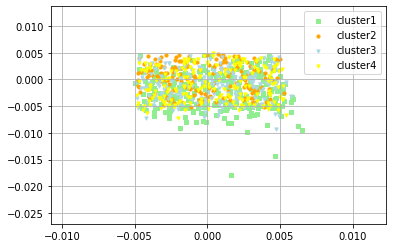

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 투자

306

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 이슈

181

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기술

205

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

195

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 11 # 투자

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 # 이슈

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label']  = 9 # 기술

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

0.7369038462638855

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 3 3 3 3 3 3 3 3 3 3 3 2 1 3 3 3 1 2 2 2 3 0 2 3 3 0 3 0 2 3 1 3 3 3 3 3
 1 1 1 3 2 1 3 3 0 0 2 3 3 1 3 0 0 3 3 3 2 1 0 1 3 2 3 0 2 0 2 0 3 3 3 1 3
 3 3 3 0 3 1 3 0 1 3 1 1 2 2 2 3 3 0 3 3 0 2 1 1 2 2 0 3 3 3 3 0 3 0 1 1 3
 0 2 3 1 3 0 3 0 3 2 3 3 1 0 3 0 0 0 0 2 0 2 3 0 0 0 1 2 3 0 0 2 2 1 2 3 0
 2 0 0 2 3 3 1 2 1 0 3 0 3 3 0 0 0 1 2 3 2 0 0 1 1 2 3 0 0 2 1 2 3 1 2 2 1
 2 3 0 0 3 3 3 0 1 1 2 1 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 3 2 2 1 1 1 0 3 3
 3 1 2 2 1 0 0 0 2 2 2 0 1 0 2 1 0 1 2 0 1 3 1 1 3 0 0 2 1 2 3 2 2 1 1 0 1
 0 1 1 2 1 0 2 2 1 2 1 0 0 3 1 3 0 0 2 3 3 1 0 2 1 2 1 3 2 0 2 2 0 2 3 0 0
 2 1 3 0 0 1 0 1 0 2 3 3 1 1 2 2 1 1 2 0 0 1 0 2 2 0 2 2 0 1 0 0 2 2 0 0 1
 2 1 2 0 1 1 1 1 2 1 3 1 0 1 0 2 0 0 3 3 1 2 0 2 0 0 1 0 2 2 1 1 0 2 2 1 2
 1 1 3 1 1 2 1 0 1 2 1 3 1 0 2 1 1 0 1 0 0 0 3 2 1 2 0 3 2 2 0 2 2 2 0 1 0
 1 2 0 1 1 0 3 1 2 3 2 1 2 1 0 2 1 1 2 1 0 0 1 1 1 1 1 2 0 1 2 1 0 3 1 2 1
 1 0 3 3 2 0 0 1 1 2 2 2 0 2 0 0 2 2 2 2 1 1 2 2 2 2 2 1 3 1 2 2

In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.7369037866592407


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.010984084


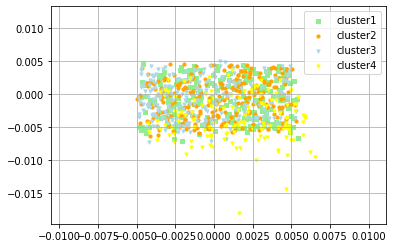

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
26,"[0.004936637822538614, 0.0016791661037132144, ...",factor,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.031289,0.036928,0.994362,NaN
100,"[-0.0020407603587955236, -0.007142603397369385...",mine,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.027664,0.015107,1.012557,NaN
116,"[-0.0031679850071668625, 6.21961007709615e-05,...",exchange,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.029122,0.010071,1.019051,NaN
345,"[0.003765379311516881, -0.004548912402242422, ...",precios,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.026026,0.006714,1.019312,NaN
105,"[-0.0023004047106951475, -0.000502109178341925...",monnaies,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.028582,0.008393,1.020190,NaN
192,"[0.004127699416130781, -0.00041056860936805606...",cointelegraph,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.030401,0.010071,1.020330,NaN
162,"[-0.003888539271429181, -0.0010059431660920382...",dinero,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.028890,0.008393,1.020497,NaN
66,"[0.004358601290732622, 6.299491360550746e-05, ...",мировой,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.027755,0.006714,1.021041,NaN
107,"[0.005410514306277037, -0.006697056349366903, ...",opportunités,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.029487,0.008393,1.021094,NaN
641,"[0.004219419322907925, 0.0006106265936978161, ...",operaciones,0,"[0.00071640883, -0.0007756798, 1.1327647e-05, ...",0.027826,0.006714,1.021112,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
17,"[-0.003662902396172285, -0.0028531665448099375...",rank,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.029476,0.020142,1.009334,NaN
184,"[0.0005389397265389562, 0.0009928519139066339,...",nowplaying,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.028740,0.013428,1.015312,NaN
42,"[0.0029542490374296904, -0.0007063169032335281...",percentage,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.028987,0.010071,1.018915,NaN
815,"[-0.002806014148518443, -0.0014682967448607087...",subida,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.026348,0.006714,1.019634,NaN
368,"[-0.0023654394317418337, 0.0014522131532430649...",sell,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.028168,0.008393,1.019775,NaN
38,"[-0.00043089993414469063, -0.00510603561997413...",solution,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.028462,0.008393,1.020069,NaN
37,"[0.0002164110919693485, -0.0031052830163389444...",cryptopress,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.026804,0.006714,1.020090,NaN
218,"[-0.002095985459163785, -0.004577786196023226,...",lunyr,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.030353,0.010071,1.020282,NaN
816,"[-0.0004336394486017525, -0.00453364010900259,...",precio,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.027250,0.006714,1.020536,NaN
245,"[0.0019931027200073004, -0.0005874038906767964...",casino,1,"[0.00028905296, -0.0007014502, -0.0008153864, ...",0.027278,0.006714,1.020564,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
41,"[-0.004231363069266081, -0.007254099007695913,...",high,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.029408,0.018464,1.010944,NaN
305,"[-0.0033833011984825134, 0.0007035555900074542...",spark,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.029702,0.018464,1.011238,NaN
177,"[-0.0007730540819466114, -0.001989893382415175...",twitter,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.027190,0.011750,1.015440,NaN
143,"[-0.003774116514250636, -0.0004103059472981840...",good,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.028884,0.010071,1.018813,NaN
236,"[0.003607658203691244, -0.004962694365531206, ...",btctn,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.028114,0.008393,1.019721,NaN
292,"[-0.00022582552628591657, -0.00708538061007857...",push,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.030240,0.010071,1.020169,NaN
323,"[-0.0036302998196333647, 7.910664135124534e-05...",build,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.025645,0.005036,1.020609,NaN
151,"[0.0053123715333640575, -0.0025489700492471457...",decentralizedcontrol,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.027672,0.006714,1.020958,NaN
369,"[0.002105464693158865, -0.0034804451279342175,...",keep,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.025164,0.003357,1.021807,NaN
88,"[-0.004658873192965984, 0.004154707305133343, ...",smash,2,"[-0.00084924814, -0.0008043969, 0.00033159333,...",0.026943,0.005036,1.021907,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 거래소,돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
9,"[0.0016358988359570503, -0.01791541650891304, ...",ethereum,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.059067,0.845976,0.213092,NaN
4,"[0.004626608919352293, -0.014411128126084805, ...",bitcoin,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.039246,0.436416,0.602830,NaN
11,"[0.004111249465495348, -0.008463690988719463, ...",price,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.029400,0.137639,0.891761,NaN
27,"[0.003069760277867317, 3.6000132240587845e-05,...",overtake,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.028568,0.114140,0.914429,NaN
1,"[0.004920312203466892, -0.0059122368693351746,...",blockchain,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.039110,0.104068,0.935041,NaN
24,"[0.00576659943908453, -0.0031636531930416822, ...",surge,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.029264,0.060427,0.968838,NaN
16,"[0.005904024466872215, -0.003635806031525135, ...",market,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.034088,0.060427,0.973662,NaN
48,"[0.00222518271766603, -0.0027292650192976, 0.0...",cryptocurrency,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.028117,0.052034,0.976083,NaN
186,"[0.0027005209121853113, -0.009889354929327965,...",dash,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.028884,0.040285,0.988599,NaN
15,"[-0.0014992386568337679, -0.007069083862006664...",change,3,"[0.0014831051, -0.003726164, -0.0005827233, -0...",0.030776,0.041963,0.988813,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 인플

256

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 비즈

261

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 투자

232

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 거래소,돈

138

In [93]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [94]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 6 # 인플

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 7 # 비즈

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 11 # 투자

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 12 # 거래소,돈

In [98]:
temp_cluster_result1['Silhouette'] = 0.010984084
temp_cluster_result['Silhouette'] = 0.010984084
temp_cluster_result1['result'] = 2
temp_cluster_result['result'] = 2

In [99]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_ETH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/after_down_ETH0_cosine")